# Setting up our envionment

In [1]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 38.02 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [2]:
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 827.8MB 21kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=3371f89fb8510d9c32137d6263b71a945745812b85e38cac93cc3d53682bbca1
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [3]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     - 337kB 27.5MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=2db6e28dd7ce0ce1585384650d3d075bc87be4127c214aedde022e978274c610
  Stored in directory: /tmp/pip-ephem-wheel-cache-x7h53df9/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16032 sha256=4e9b8a2b4aa99d57734730c7842db6d2e82475f5bda56a7c92240e1599ea3dd8
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |██████████████████

# Get data

In [ ]:
#TODO: remove
# clear directories
!rm -rf train
!rm -rf Buses
!rm -rf ObjDetectChallenge-EfficientDet

In [4]:
# Clone the repo so we'll have access to the data
!git clone https://github.com/oshertidhar/ObjDetectChallenge-EfficientDet.git

Cloning into 'ObjDetectChallenge-EfficientDet'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 102 (delta 7), reused 0 (delta 0), pack-reused 76
Receiving objects: 100% (102/102), 146.41 MiB | 52.31 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [5]:
!mkdir train
%cp ObjDetectChallenge-EfficientDet/busesTrain/* train/

In [ ]:
#let's take a look at our directory
%ls 

Monk_Object_Detection/  ObjDetectChallenge-EfficientDet/  sample_data/  train/


In [ ]:
#let's take a peek in train
#jpg images and some coco json annotations
%ls train

ls: cannot access 'train': No such file or directory


In [ ]:
#let's take a peek at the annotations
#class categories, and bounding boxes are provided for our train set
%pycat train/_annotations.coco.json

In [6]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir Buses
!mkdir Buses/annotations
!mkdir Buses/Annotations
!mkdir Buses/Images

In [7]:
%cp train/_annotations.coco.json Buses/annotations/instances_Images.json

In [8]:
%cp train/*.JPG Buses/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [9]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [10]:
from train_detector import Detector

In [11]:
gtf = Detector();

In [12]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Buses";
img_dir = "./";
set_dir = "Images";

In [13]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=2, image_size=(3648, 2736), use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [14]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [15]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
#%xmode Verbose
%xmode Context

Exception reporting mode: Context


In [16]:
%%time
gtf.Train(num_epochs=100, model_output_dir="trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this fu


Epoch    58: reducing learning rate of group 0 to 1.0000e-05.



Epoch    80: reducing learning rate of group 0 to 1.0000e-06.



Epoch    88: reducing learning rate of group 0 to 1.0000e-07.



Epoch    95: reducing learning rate of group 0 to 1.0000e-08.



CPU times: user 12min 12s, sys: 32.3 s, total: 12min 44s
Wall time: 43min 27s


In [ ]:
%debug

# Test

In [17]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [18]:
from infer_detector import Infer

In [19]:
gtf = Infer();

In [20]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [21]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [30]:
class_list

['bus_color', '1', '2', '3', '4', '5', '6']

In [119]:
!rm -rf test
!mkdir test
%cp Buses/Images/*0.JPG test/

In [120]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.JPG')]
import random
img_path = "test/" + random.choice(test_images);

CPU times: user 0 ns, sys: 829 µs, total: 829 µs
Wall time: 918 µs


In [112]:
print(img_path)

test/DSCF1132.JPG


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
image = cv2.imread(img_path)
image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE) 
cv2_imshow(image)
cv2.imwrite('image.jpg', image)

In [114]:
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

image = io.imread(img_path)
image = rotate(image, angle=15)
image = np.fliplr(image)
io.imsave('image.jpg', image)

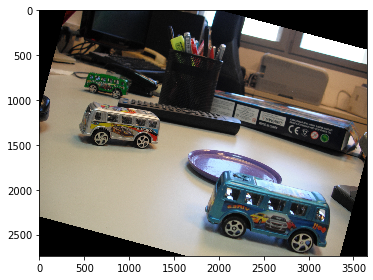

In [115]:
io.imshow(image)

In [116]:
duration, scores, labels, boxes = gtf.Predict('image.jpg', class_list, vis_threshold=0.2);

Done. (0.035s)


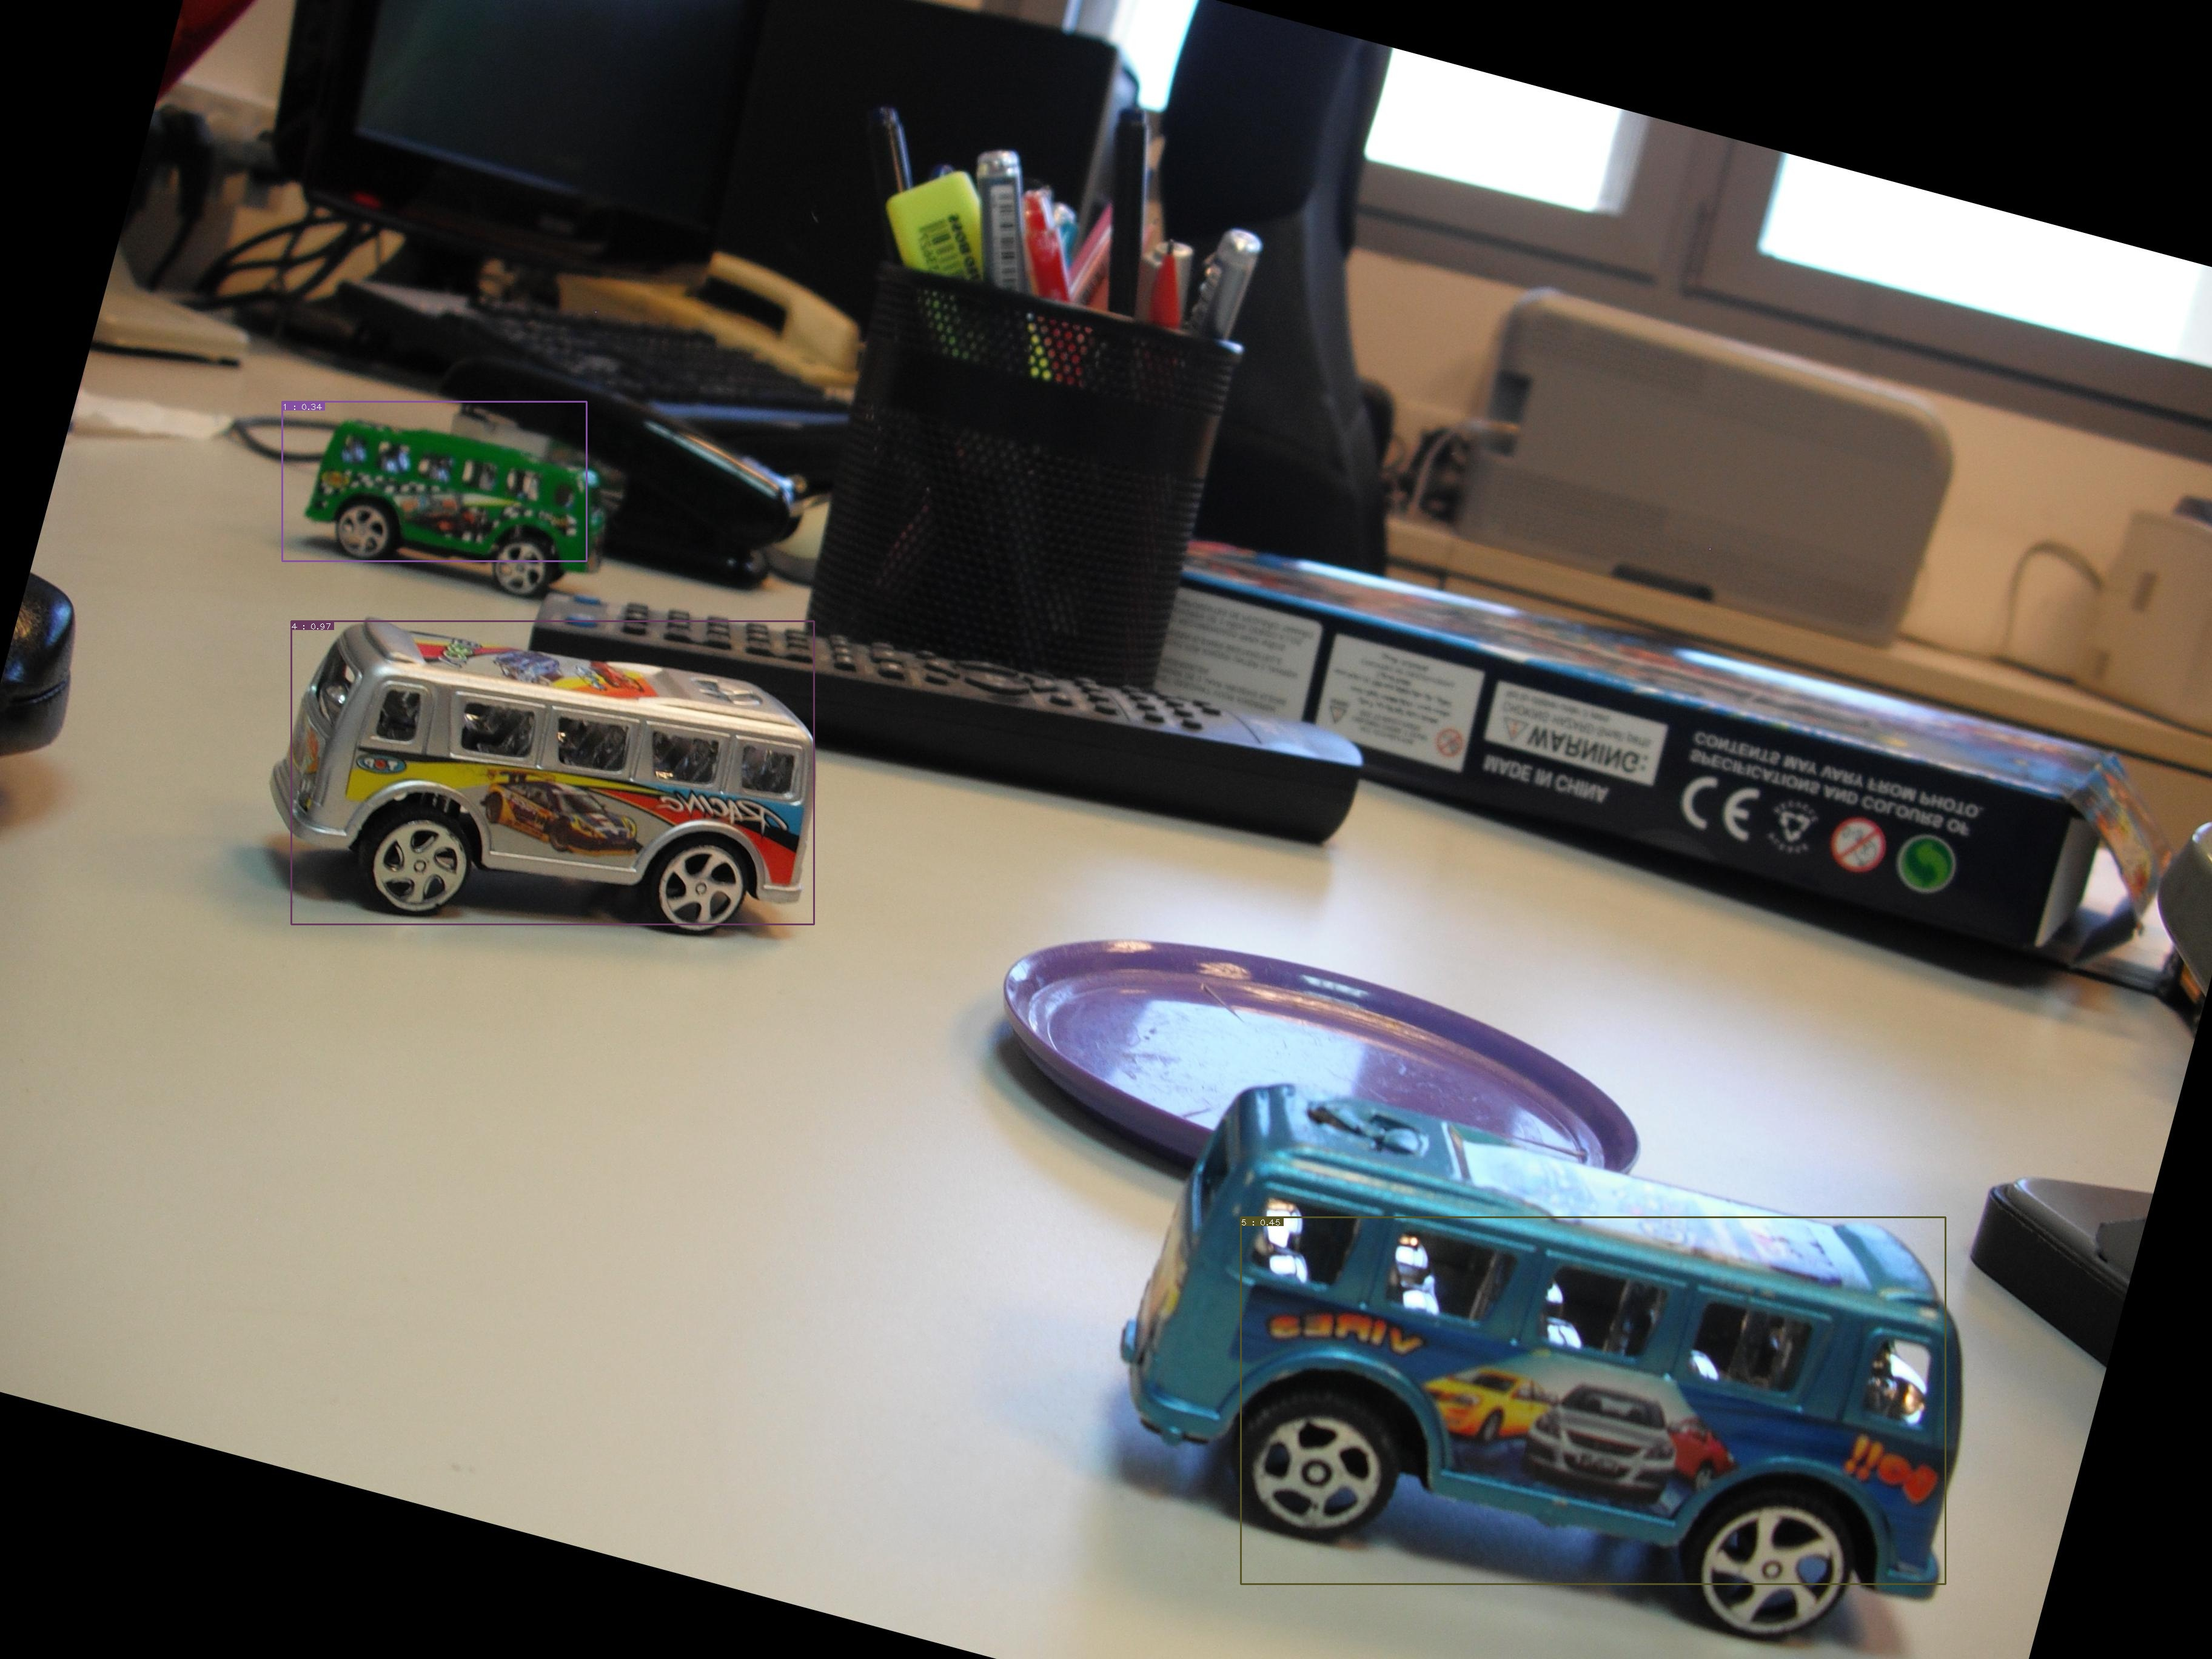

In [117]:
from IPython.display import Image
Image(filename='output.jpg') 

# Export Trained Weights

In [28]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

In [ ]:
#recover trained weights
!mkdir '/trained'
#note these are old weights that I didn't train for too long
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-04-10-15:18.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-04-10-15:18.pth' '/trained/signatrix_efficientdet_coco.pth'

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/trained")

In [ ]:
#download some test data
!curl -L [YOUR LINK HERE] | jar -x

In [ ]:
!ls test

In [ ]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

In [ ]:
%%time
#bang!
img_path = "test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.49b342a7b1f6de3f0e328beaf094a945.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 